# Random Forest Regression

 Importing used libraries:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

Loading dataset:

In [2]:
df = pd.read_csv("dataset/preprocessed_train_PCA.csv")
print('Dataset has been loaded correctly')

Dataset has been loaded correctly


In [3]:
print('(examples,columns)')
df.shape

(examples,columns)


(433958, 47)

selecting useful features:

In [4]:
df = df.drop(['NumberOfCustomers'], axis=1)
print('Since we do not have NumberOfCustomers attribute in the test set, we drop it.')

Since we do not have NumberOfCustomers attribute in the test set, we drop it.


In [5]:
print('Categorical attributes are dropped because we consider for the analysis the "One Hot Encoding" version.')
df = df.drop(['Unnamed: 0','StoreType','AssortmentType','Events'], axis=1)

Categorical attributes are dropped because we consider for the analysis the "One Hot Encoding" version.


### Attributes kept:

In [6]:
df.head().T

,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,01/03/2016,02/03/2016,04/03/2016,05/03/2016,07/03/2016
IsHoliday,0,0,0,0,0
HasPromotions,0,0,0,0,1
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfSales,5676,8111,8300,7154,10110
Region_AreaKM2,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130
Region_PopulationK,2770,2770,2770,2770,2770


The attributes identified by "px" where x goes from 1 to 12 are the components obtained performing PCA on several attributes. 
You can check the whole PCA notebook looking at "3.4_Prepr_train_PCA".

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

Loading train and test set:

In [8]:
import modify_dataset as md
train = md.get_fake_train2(df)
test = md.get_fake_test2(df)
y_train=train['NumberOfSales']
y_test=test['NumberOfSales']

# Feature selection on the train set:

In [9]:
features = list(train.columns.values)
features.remove('NumberOfSales')
features.remove('StoreID')
#features.remove('D_Year')
features.remove('Date')
features.remove('D_DayOfweek')
features.remove('Min_VisibilitykM')
features.remove('Max_VisibilityKm')
#features.remove('AssortmentType_WithFishDept')
#features.remove('StoreType_StandardMarket')
#features.remove('AssortmentType_General')
#features.remove('IsHoliday')
#features.remove('CloudCover')
#features.remove('AssortmentType_WithNFDept')
#features.remove('StoreType_SuperMarket')
print("features")

print(features)

features
['IsHoliday', 'HasPromotions', 'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK', 'CloudCover', 'WindDirDegrees', 'D_Day', 'D_DayOfYear', 'D_Month', 'D_Year', 'StoreType_SuperMarket', 'StoreType_HyperMarket', 'StoreType_StandardMarket', 'StoreType_ShoppingCenter', 'AssortmentType_General', 'AssortmentType_WithNFDept', 'AssortmentType_WithFishDept', 'MeanStoreSales', 'MeanRegionSales', 'D_DayOfWeek_cos', 'D_DayOfWeek_sin', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12']


In [10]:
train.shape

(396420, 42)

In [11]:
train[features].head().T

,0,1,2,3,4
IsHoliday,0.000000,0.000000,0.000000,0.000000,0.000000
HasPromotions,0.000000,0.000000,0.000000,0.000000,1.000000
NearestCompetitor,326.000000,326.000000,326.000000,326.000000,326.000000
Region,7.000000,7.000000,7.000000,7.000000,7.000000
Region_AreaKM2,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000
Region_GDP,17130.000000,17130.000000,17130.000000,17130.000000,17130.000000
Region_PopulationK,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000
CloudCover,8.000000,8.000000,8.000000,6.000000,0.000000
WindDirDegrees,23.000000,56.000000,22.000000,108.000000,68.000000
D_Day,1.000000,2.000000,4.000000,5.000000,7.000000


# Random Forest parameters tuning

n_estimators analysis: 

In [12]:
params = range(1, 101, 10)  #50,201,50

In [13]:
from sklearn.ensemble import RandomForestRegressor
scores, tst_scr = validation_curve(RandomForestRegressor(), train[features][:20000],\
                                   y_train[:20000], 'n_estimators', params, \
                                   cv=5, scoring='r2',n_jobs=-1, verbose=2)

[CV] n_estimators=1 ..................................................
[CV] n_estimators=11 .................................................
[CV] n_estimators=21 .................................................
[CV] n_estimators=31 .................................................
[CV] n_estimators=41 .................................................
[CV] n_estimators=51 .................................................
[CV] n_estimators=61 .................................................
[CV] n_estimators=71 .................................................
[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=81 .................................................
[CV] .................................. n_estimators=11, total=   5.3s
[CV] n_estimators=91 .................................................
[CV] .................................. n_estimators=21, total=  10.4s
[CV] n_estimators=1 ..................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:  1.5min remaining:  1.5min


[CV] .................................. n_estimators=51, total=  35.3s
[CV] n_estimators=31 .................................................
[CV] .................................. n_estimators=11, total=   7.2s
[CV] n_estimators=41 .................................................
[CV] .................................. n_estimators=91, total= 1.1min
[CV] n_estimators=51 .................................................
[CV] .................................. n_estimators=21, total=  14.9s
[CV] n_estimators=61 .................................................
[CV] .................................. n_estimators=61, total=  44.0s
[CV] n_estimators=71 .................................................
[CV] .................................. n_estimators=71, total= 1.1min
[CV] n_estimators=81 .................................................
[CV] .................................. n_estimators=31, total=  39.9s
[CV] n_estimators=91 .................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.7min finished


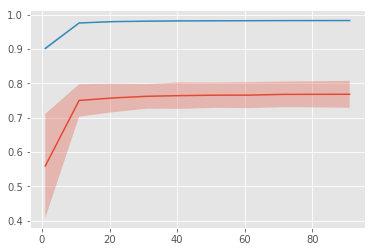

In [14]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

As we can see in the graph, from 40 estimators on the performance curve is stable, so we set n_estimators = 40. 

##### 

max_features analysis:

In [15]:
params = range(1, 35,2)

In [16]:
from sklearn.ensemble import RandomForestRegressor
scores, tst_scr = validation_curve(RandomForestRegressor(n_estimators=10), train[features][:20000], \
                                   y_train[:20000], 'max_features', params, \
                                   cv=3, scoring='r2',n_jobs=-1, verbose=2)

[CV] max_features=1 ..................................................
[CV] max_features=3 ..................................................
[CV] max_features=5 ..................................................
[CV] max_features=7 ..................................................
[CV] max_features=9 ..................................................
[CV] max_features=11 .................................................
[CV] max_features=13 .................................................
[CV] max_features=15 .................................................
[CV] ................................... max_features=1, total=   1.0s
[CV] max_features=17 .................................................
[CV] ................................... max_features=3, total=   1.9s
[CV] max_features=19 .................................................
[CV] ................................... max_features=5, total=   2.2s
[CV] max_features=21 .................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  26 out of  51 | elapsed:   23.7s remaining:   22.8s


[CV] .................................. max_features=19, total=   7.6s
[CV] max_features=1 ..................................................
[CV] .................................. max_features=21, total=   8.6s
[CV] max_features=3 ..................................................
[CV] ................................... max_features=1, total=   1.4s
[CV] max_features=5 ..................................................
[CV] .................................. max_features=23, total=   9.2s
[CV] max_features=7 ..................................................
[CV] ................................... max_features=3, total=   2.3s
[CV] max_features=9 ..................................................
[CV] ................................... max_features=5, total=   2.3s
[CV] max_features=11 .................................................
[CV] .................................. max_features=25, total=  11.0s
[CV] max_features=13 .................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:   49.1s finished


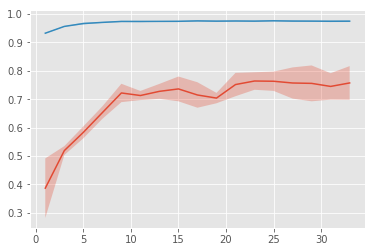

In [17]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

As we can see in the chart above, it seems that more than 20 features can ensure the best performances.

max_depth analysis:

In [18]:
params = range(5, 101, 5)

In [19]:
from sklearn.ensemble import RandomForestRegressor
scores, tst_scr = validation_curve(RandomForestRegressor(n_estimators=100), train[features][:20000], \
                                   y_train[:20000], 'max_depth', params, \
                                   cv=3, scoring='r2',n_jobs=-1, verbose=2)

[CV] max_depth=5 .....................................................
[CV] max_depth=10 ....................................................
[CV] max_depth=15 ....................................................
[CV] max_depth=20 ....................................................
[CV] max_depth=25 ....................................................
[CV] max_depth=30 ....................................................
[CV] max_depth=35 ....................................................
[CV] max_depth=40 ....................................................
[CV] ...................................... max_depth=5, total=  44.3s
[CV] max_depth=45 ....................................................
[CV] ..................................... max_depth=10, total= 1.4min
[CV] max_depth=50 ....................................................
[CV] ..................................... max_depth=15, total= 2.0min
[CV] max_depth=55 ....................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  30 out of  60 | elapsed:  9.2min remaining:  9.2min


[CV] ..................................... max_depth=60, total= 2.3min
[CV] max_depth=95 ....................................................
[CV] ..................................... max_depth=55, total= 2.4min
[CV] max_depth=100 ...................................................
[CV] ..................................... max_depth=65, total= 2.4min
[CV] max_depth=5 .....................................................
[CV] ..................................... max_depth=70, total= 2.4min
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=75, total= 2.5min
[CV] max_depth=15 ....................................................
[CV] ...................................... max_depth=5, total=  45.3s
[CV] max_depth=20 ....................................................
[CV] ..................................... max_depth=80, total= 2.5min
[CV] max_depth=25 ....................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 17.2min finished


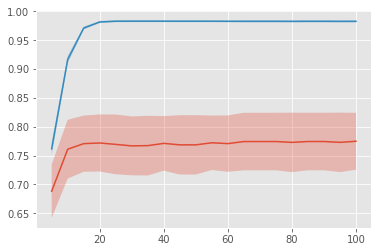

In [20]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

The graph above show how a suitable value for max_depth is 20, indeed even increasing it, the performance are stable.

# Model Building 

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model1 = RandomForestRegressor(n_estimators=30, max_depth=20, n_jobs=-1, verbose=2)

In [23]:

model1.fit(train[features], train['NumberOfSales'])

building tree 1 of 30building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30

building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30building tree 28 of 30

building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.3min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

Which are the most relevant features?

In [24]:
idx = model1.feature_importances_.argsort()[::-1]

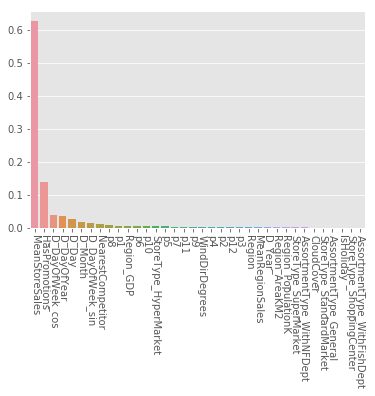

In [25]:
ax = sns.barplot(x=df[features].columns[idx], y=model1.feature_importances_[idx])
_ = plt.setp(ax.get_xticklabels(), rotation=-90)

# Predict

In [26]:
test['_NumberOfSales'] = model1.predict(test[features])

[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.2s finished
/home/nyxgear/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Estimating error through BIP function

In [27]:
from BIP import get_BIP_error
error1 = get_BIP_error(test)

Number of regions identified: 11
BIP total error: 0.039023677716598745


In [28]:
test.to_csv('./dataset/test_m34_53_RFR_on_prep.csv', index=False)

# Estimating error through R2 function

In [29]:
# calculationg R2

# calculate RSS
df_RSS = test
print(df_RSS.shape)

df_RSS['sqrd_diff'] = df_RSS.apply(lambda x: (x['NumberOfSales'] - x['_NumberOfSales'])**2, axis=1)

RSS = df_RSS['sqrd_diff'].sum()
print('RSS:', RSS)
df_RSS.head()

(37538, 43)
RSS: 22930257251.873966


/home/nyxgear/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,StoreID,Date,IsHoliday,HasPromotions,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,...,p5,p6,p7,p8,p9,p10,p11,p12,_NumberOfSales,sqrd_diff
302,1000,01/03/2017,0,0,326,7,5509,9643,17130,2770,...,0.000806,0.000149,-0.000959,-0.001319,0.000212,-0.000807,-0.000501,0.000075,6516.754948,1.015570e+06
303,1000,02/03/2017,0,0,326,7,5881,9643,17130,2770,...,0.001677,0.000083,-0.000667,-0.001192,0.000634,-0.000880,-0.000140,0.000136,7581.547667,2.891862e+06
304,1000,03/03/2017,0,0,326,7,8463,9643,17130,2770,...,0.000375,-0.000737,-0.000513,-0.001374,0.000028,-0.000454,-0.000162,-0.000145,7811.488644,4.244670e+05
305,1000,04/03/2017,0,0,326,7,8146,9643,17130,2770,...,0.000638,-0.000178,-0.001210,-0.001291,0.000311,-0.000514,-0.000457,0.000222,7372.134586,5.988677e+05
306,1000,06/03/2017,0,1,326,7,11306,9643,17130,2770,...,0.000444,-0.001092,-0.000595,-0.001506,-0.000381,-0.000430,0.000514,0.000050,10448.305411,7.356400e+05


In [30]:
# calculate TSS

df_TSS = test
NS_mean = df_TSS['NumberOfSales'].mean()
print('NS_mean', NS_mean)

df_TSS['sqrd_diff'] = df_TSS.apply(lambda x:  (x['_NumberOfSales'] - NS_mean)**2, axis=1)
TSS = df_TSS['sqrd_diff'].sum()
print('TSS:', TSS)
df_TSS.head()

NS_mean 4725.085193670414
TSS: 150121298025.0851


/home/nyxgear/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,StoreID,Date,IsHoliday,HasPromotions,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,...,p5,p6,p7,p8,p9,p10,p11,p12,_NumberOfSales,sqrd_diff
302,1000,01/03/2017,0,0,326,7,5509,9643,17130,2770,...,0.000806,0.000149,-0.000959,-0.001319,0.000212,-0.000807,-0.000501,0.000075,6516.754948,3.210081e+06
303,1000,02/03/2017,0,0,326,7,5881,9643,17130,2770,...,0.001677,0.000083,-0.000667,-0.001192,0.000634,-0.000880,-0.000140,0.000136,7581.547667,8.159378e+06
304,1000,03/03/2017,0,0,326,7,8463,9643,17130,2770,...,0.000375,-0.000737,-0.000513,-0.001374,0.000028,-0.000454,-0.000162,-0.000145,7811.488644,9.525886e+06
305,1000,04/03/2017,0,0,326,7,8146,9643,17130,2770,...,0.000638,-0.000178,-0.001210,-0.001291,0.000311,-0.000514,-0.000457,0.000222,7372.134586,7.006870e+06
306,1000,06/03/2017,0,1,326,7,11306,9643,17130,2770,...,0.000444,-0.001092,-0.000595,-0.001506,-0.000381,-0.000430,0.000514,0.000050,10448.305411,3.275525e+07


In [31]:
# calculate R2
print("RSS:", RSS, "   TSS:", TSS)

R2 = 1 - (RSS / TSS)
print('R_2:', R2)


RSS: 22930257251.873966    TSS: 150121298025.0851
R_2: 0.8472551359898157


# Da qua in poi non sapevo cosa eliminare e cosa tenere 

### Saving TEST

In [32]:
#test.to_csv('./dataset/RFR5_fake_test.csv', index=False)

In [33]:
estim = model1.estimators_ 

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [35]:
mean_absolute_error(test['NumberOfSales'], test['_NumberOfSales'])


507.91259945781013

In [36]:
r2_score(test['NumberOfSales'], test['_NumberOfSales'])

0.866835074467733

In [37]:
#defining mape
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true = y_true.reshape(1, -1)
    y_pred = y_pred.reshape(1, -1)
    #y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
mean_absolute_percentage_error(test['NumberOfSales'], test['_NumberOfSales'])

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
X_train

In [ ]:
X_test[:, [3]].shape

In [ ]:
print("Residual sum of squares: %.2f"
  % ((y_pred - y_test) ** 2).sum())

#why memory error??

In [ ]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe


def rmspe_xg(yhat, y):
   # y = y.values
   # y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

In [ ]:
rmspe_xg(y_pred,y_test)

## Sample of predicted results

In [ ]:
import matplotlib.pyplot as plt

y_pred_subset = test['_NumberOfSales'][500:600]
x_coordinate = [ 1 * i for i in range(len(y_pred_subset)) ]
plt.plot(x_coordinate,y_pred_subset)
plt.show()

## Sample of real results

In [ ]:
#REAL
import matplotlib.pyplot as plt

y_train_subset = test['NumberOfSales'][500:600]
x_coordinate = [ 1 * i for i in range(len(y_train_subset)) ]
plt.plot(x_coordinate,y_train_subset)
plt.show()

## Real-Predicted

In [ ]:
plt.plot(x_coordinate,y_train_subset)
plt.plot(x_coordinate,y_pred_subset)

plt.legend(['Predicted', 'Real'], loc='upper left')
plt.show()

### Saving model

In [ ]:
#import pickle
#RFR_1 = pickle.dumps(model1)
#clf2 = pickle.loads(s)
#clf2.predict(X[0:1])
#pickle.dump(model1, open("models\RFR_1","wb"))
#model1 = pickle.load(file=open("models\RFR_1","rb"))

## For the submission

In [ ]:
df_test = pd.read_csv

In [ ]:
df_test.IsOpen.unique()

In [ ]:
ind_open = df_test.IsOpen == 1
ind_closed = df_test.IsOpen == 0
df_test2 = df_test[ind_open]

In [ ]:
df_test2.drop('IsOpen', axis=1, inplace=True)

In [ ]:
df_test2.head().T

In [ ]:
X_out = df_test2.values

In [ ]:
y_out = model1.predict(X_out)

In [ ]:
df_out = pd.DataFrame(np.zeros(len(df_test)), columns=['NumberOfSales'])

In [ ]:
df_out[ind_open] = y_out.reshape(-1,1)

In [ ]:
df_out.set_index(np.arange(len(df_out))+1, inplace=True)

In [ ]:
df_out.index.name = 'Id'

In [ ]:
df_out.head()